<a href="https://colab.research.google.com/github/raviatkumar/Towards-Data-Science-Articles-Hybrid-Approach/blob/main/Towards_Data_Science_Articles_Approach_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : Towards Data Science Articles**

## Introduction:

"Towards Data Science" is a popular online publication that covers a wide range of topics related to data science, machine learning, artificial intelligence, and technology. The publication attracts a diverse audience of data professionals, researchers, students, and enthusiasts interested in staying updated with the latest trends and developments in the field.

##Objective:

The objective of this analysis is to perform topic modeling on a collection of articles from the "Towards Data Science" publication. By identifying key themes and topics discussed in the articles, we aim to gain insights into the prevalent subjects and trends within the data science community as covered by the publication.

##Methodology:

###Data Collection:

We collected a dataset of articles from the "Towards Data Science" publication using web scraping techniques. The dataset includes metadata such as article titles, authors, publication dates, and the text content of the articles.

###Data Preprocessing:

Text preprocessing techniques were applied to clean and prepare the text data for analysis. This involved converting text to lowercase, removing punctuation, stopwords, and non-alphanumeric characters, as well as lemmatization.
The preprocessed text data was tokenized into words or tokens to facilitate further analysis.

###Topic Modeling:

We employed Latent Dirichlet Allocation (LDA), a popular topic modeling technique, to identify underlying topics within the corpus of articles.
A dictionary and corpus were created from the preprocessed text data, and the LDA model was trained on the corpus to extract topics.
The number of topics was determined based on domain knowledge and experimentation with different values.

###Visualization and Interpretation:

The topics generated by the LDA model were visualized using the pyLDAvis library, allowing us to explore the main themes discussed in the articles.
We analyzed the top keywords associated with each topic and interpreted the significance of the identified topics.
Common themes and trends within the data science community were identified based on the topics extracted from the articles.

###Evaluation and Recommendations:

We evaluated the effectiveness of the topic modeling approach in capturing the main subjects covered in the "Towards Data Science" publication.
Based on the analysis, we provided recommendations for potential future content or research directions within the data science domain.
Insights gained from the analysis were discussed, along with potential implications for the data science community.

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import  stopwords
import string
from sklearn.manifold import TSNE
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from collections import Counter
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pprint
import pyLDAvis
import pyLDAvis.gensim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from keras.utils import plot_model
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Dropout
from sklearn.metrics import classification_report
from keras.layers import GRU
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Interview_question_solved/Machine learning /Machine Learning /Unsupervised learning/NLP and Topic Modelling/NLP Project/Dataset/medium.csv')

In [ ]:
df.head()

,Title,Text
0,A Beginner’s Guide to Word Embedding with Gens...,1. Introduction of Word2vec\n\nWord2vec is one...
1,Hands-on Graph Neural Networks with PyTorch & ...,"In my last article, I introduced the concept o..."
2,How to Use ggplot2 in Python,Introduction\n\nThanks to its strict implement...
3,Databricks: How to Save Data Frames as CSV Fil...,Photo credit to Mika Baumeister from Unsplash\...
4,A Step-by-Step Implementation of Gradient Desc...,A Step-by-Step Implementation of Gradient Desc...


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#####**Preprocessing**

In [ ]:
# Load English stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
# Load English language model for spaCy
nlp = spacy.load('en_core_web_sm')

In [ ]:
def text_preprocessing(text):
    """
    Preprocesses the text by:
    - Converting text to lowercase
    - Removing square brackets and their contents
    - Removing non-word characters
    - Removing URLs
    - Removing HTML tags
    - Removing punctuation
    - Removing newline characters
    - Removing alphanumeric words
    """
    text = str(text)
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
def drop_stopwords(text):
    """
    Removes stopwords from the text.
    """
    dropped = [word for word in text.split() if word not in stop_words]
    final_text = ' '.join(dropped)
    return final_text

In [ ]:
def lemmatization(text):
    """
    Lemmatizes the text using spaCy.
    """
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

In [ ]:
def delete_one_characters(text):
    """
    Removes single-character words from the text.
    """
    deleted = [word if len(word) > 1 else "" for word in text.split()]
    final_text = ' '.join(deleted)
    return final_text

In [ ]:
# Applying preprocessing functions
data = df.copy()

#####**EDA**

In [ ]:
data['Title'] = data['Title'].apply(text_preprocessing).apply(drop_stopwords).apply(lemmatization).apply(delete_one_characters)

In [ ]:
data['Text'] = data['Text'].apply(text_preprocessing).apply(drop_stopwords).apply(lemmatization).apply(delete_one_characters)

In [ ]:
# Concatenate all preprocessed Title into a single string
all_Title = ' '.join(data['Title'])

In [ ]:
# Create a WordCloud object
wordcloud_Title = WordCloud(width=800, height=400, background_color='white').generate(all_Title)

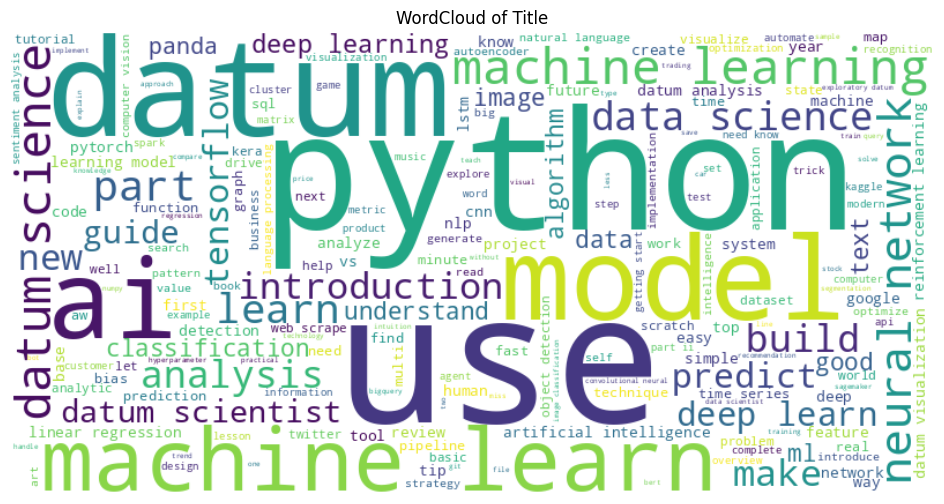

In [ ]:
# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_Title, interpolation='bilinear')
plt.title('WordCloud of Title')
plt.axis('off')
plt.show()

In [ ]:
# Concatenate all preprocessed texts into a single string
all_Text = ' '.join(data['Text'])

In [ ]:
# Create a WordCloud object
wordcloud_Text = WordCloud(width=800, height=400, background_color='white').generate(all_Text)

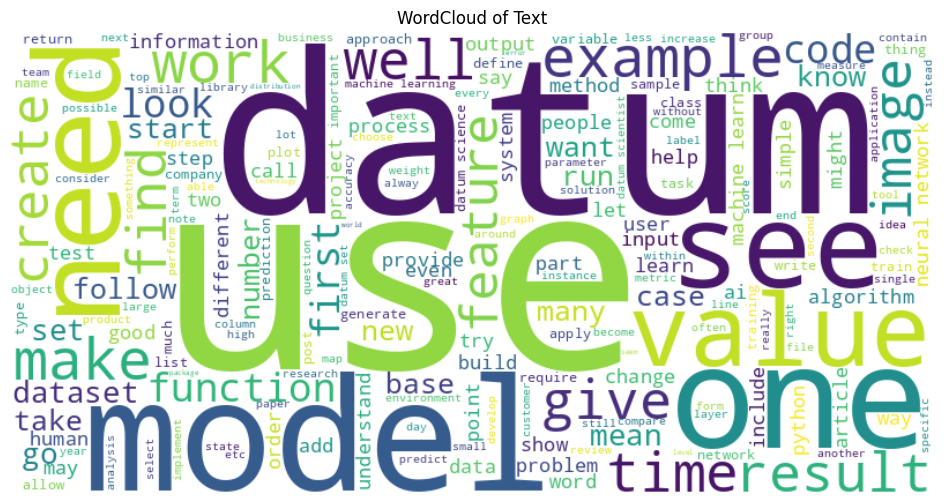

In [ ]:
# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_Text, interpolation='bilinear')
plt.title('WordCloud of Text')
plt.axis('off')
plt.show()

In [ ]:
# Calculate word lengths for each word in preprocessed text
word_lengths_Title = data['Title'].str.split().apply(lambda x: [len(word) for word in x])

In [ ]:
# Flatten the list of word lengths
flat_word_lengths_Title = [length for sublist in word_lengths_Title for length in sublist]

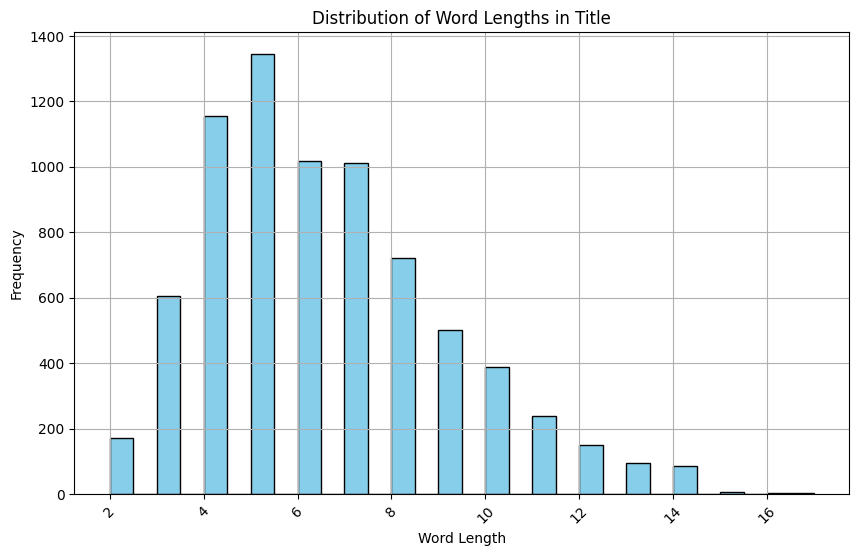

In [ ]:
# Plot the distribution of word lengths
plt.figure(figsize=(10, 6))
plt.hist(flat_word_lengths_Title, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Lengths in Title')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

*  Most Frequent Word Lengths: It appears that titles with 2 or 3 words are the most frequent (highest bars on the chart). This suggests that titles in your data tend to be concise and informative.

*  Distribution Tail: The distribution appears to be right-skewed, meaning there are more titles with shorter word lengths (left side of the plot) and fewer titles with longer word lengths (right side of the plot). This suggests that while most titles are concise, there are also some titles that are more descriptive and use more words.


In [ ]:
# Calculate word lengths for each word in Text
word_lengths_text = data['Text'].str.split().apply(lambda x: [len(word) for word in x])

In [ ]:
# Flatten the list of word lengths
flat_word_lengths_text = [length for sublist in word_lengths_text for length in sublist]

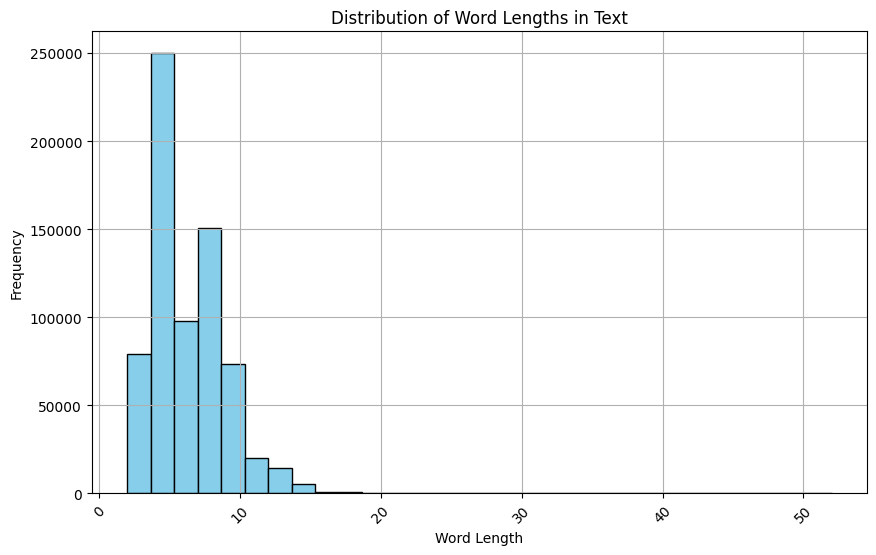

In [ ]:
# Plot the distribution of word lengths
plt.figure(figsize=(10, 6))
plt.hist(flat_word_lengths_text, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Lengths in Text')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

*  Most Frequent Word Lengths: By observing the highest bars on the histogram, we can see that words with a length of 3-5 characters are the most frequent in your text data. This suggests that the text corpus consists mainly of short and common words.

*  Distribution Pattern: The histogram exhibits a right-skewed distribution. This means that there are more short and common words (left side) compared to longer and less frequent words (right side). This pattern is typical of natural language data, where short function words like pronouns, articles, and prepositions are used more often than longer content words like nouns, verbs, or adjectives.

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Tokenize the 'Title' and 'Text' columns
data['Title_tokens'] = data['Title'].apply(word_tokenize)
data['Text_tokens'] = data['Text'].apply(word_tokenize)

In [ ]:
# Train Word2Vec model for the 'Title' column
title_word2vec_model = Word2Vec(sentences=data['Title_tokens'], vector_size=100, window=5, min_count=1, workers=4)
# Train Word2Vec model for the 'Text' column
text_word2vec_model = Word2Vec(sentences=data['Text_tokens'], vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
# Extract word embeddings for a given text using the trained Word2Vec models
def get_word_embeddings(text_tokens, model):
    word_embeddings = []
    for word in text_tokens:
        if word in model.wv:
            word_embeddings.append(model.wv[word])
    return np.mean(word_embeddings, axis=0) if word_embeddings else np.zeros(model.vector_size)

In [ ]:
title_embeddings = data['Title_tokens'].apply(lambda x: get_word_embeddings(x, title_word2vec_model))
text_embeddings = data['Text_tokens'].apply(lambda x: get_word_embeddings(x, text_word2vec_model))

In [ ]:
title_embeddings

0       [0.0019259673, -0.0017321197, 0.002150059, 0.0...
1       [-0.0040851375, 0.004760745, -0.0021166282, 0....
2       [-0.009314169, 0.0077046603, -0.0012544398, 0....
3       [-0.00022184924, -0.0023951798, -0.0017126423,...
4       [0.0011496305, 0.003329966, -0.003655731, -0.0...
                              ...                        
1386    [-0.0043469607, 0.006377233, 0.00026223785, 0....
1387    [-0.0020035533, 0.005853093, -0.0031304439, -0...
1388    [0.0030358236, -0.002380113, 0.00079750177, -0...
1389    [0.0008960271, -0.00012433564, 0.0025490066, -...
1390    [0.0016723523, 0.0022776292, 0.0022959094, 0.0...
Name: Title_tokens, Length: 1391, dtype: object

In [ ]:
text_embeddings

0       [-0.14594837, 0.49691397, 0.32573155, 0.362682...
1       [0.07116571, 0.969761, 0.46428633, 0.014785807...
2       [-0.091174945, 0.60167485, 0.26616728, 0.38593...
3       [-0.10095413, 0.6203648, 0.22952768, 0.4452532...
4       [-0.028829575, 0.9251839, 0.7399801, 0.502922,...
                              ...                        
1386    [-0.07628574, 0.6814235, 0.42750388, 0.0508662...
1387    [-0.23525849, 0.3355845, 0.31035462, 0.2127028...
1388    [-0.19906683, 0.41224426, 0.32659432, 0.021041...
1389    [-0.19550504, 0.3990375, 0.42973068, -0.104879...
1390    [-0.15447812, 0.37328938, 0.30944437, 0.081913...
Name: Text_tokens, Length: 1391, dtype: object

In [ ]:
def concatenate_embeddings(text_embeddings):
    concatenated_embeddings = []
    for embeddings in text_embeddings:
        if len(embeddings) > 0:
            if embeddings[0].ndim > 0:
                concatenated = np.concatenate(embeddings)
                concatenated_embeddings.append(concatenated)
            else:
                concatenated_embeddings.append(embeddings[0])
        else:
            concatenated_embeddings.append(np.zeros(text_word2vec_model.vector_size))
    return concatenated_embeddings

def average_embeddings(text_embeddings):
    averaged_embeddings = []
    for embeddings in text_embeddings:
        if len(embeddings) > 0:
            averaged = np.mean(embeddings, axis=0)
            averaged_embeddings.append(averaged)
        else:
            averaged_embeddings.append(np.zeros(text_word2vec_model.vector_size))
    return averaged_embeddings

In [ ]:
concatenated_title_embeddings = concatenate_embeddings(title_embeddings)
averaged_title_embeddings = average_embeddings(title_embeddings)

In [ ]:
concatenated_text_embeddings = concatenate_embeddings(text_embeddings)
averaged_text_embeddings = average_embeddings(text_embeddings)

In [ ]:
# Create new columns for concatenated and averaged embeddings in the DataFrame
data['concatenated_title_embeddings'] = concatenated_title_embeddings
data['averaged_title_embeddings'] = averaged_title_embeddings
data['concatenated_text_embeddings'] = concatenated_text_embeddings
data['averaged_text_embeddings'] = averaged_text_embeddings

In [ ]:
print("Length of DataFrame:", len(data))
print("Length of concatenated_title_embeddings:", len(concatenated_title_embeddings))
print("Length of averaged_title_embeddings:", len(averaged_title_embeddings))
print("Length of concatenated_text_embeddings:", len(concatenated_text_embeddings))
print("Length of averaged_text_embeddings:", len(averaged_text_embeddings))

Length of DataFrame: 1391
Length of concatenated_title_embeddings: 1391
Length of averaged_title_embeddings: 1391
Length of concatenated_text_embeddings: 1391
Length of averaged_text_embeddings: 1391


#####**Topic Modelling**

In [ ]:
pip install pyLDAvis

In [ ]:
# Create dictionary
id2word = Dictionary(data['Text_tokens'])
id2word.filter_extremes(no_below=10, no_above=0.5)

In [ ]:
# Create corpus
corpus = [id2word.doc2bow(text) for text in data['Text_tokens']]

In [ ]:
# Train LDA model
NUM_TOPICS = 10
lda_model = LdaModel(corpus, num_topics=NUM_TOPICS, id2word=id2word, iterations=200, random_state=42)

In [ ]:
# Create dictionary
id2word = Dictionary(data['Text_tokens'])
id2word.filter_extremes(no_below=10, no_above=0.5)

In [ ]:
# Create corpus
corpus = [id2word.doc2bow(text) for text in data['Text_tokens']]

In [ ]:
NUM_TOPICS = 10
SEED = 42

In [ ]:
lda_model = LdaModel(corpus, num_topics=NUM_TOPICS, id2word=id2word, iterations=200, random_state=SEED)

In [ ]:
# Visualize topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.008504 -0.013173       1        1  16.954982
1      0.040357  0.027260       2        1  16.307091
3      0.008657 -0.017376       3        1  13.913912
0      0.001358 -0.004085       4        1  12.437862
6      0.009364 -0.003744       5        1  12.297267
4      0.006381  0.014251       6        1   8.896259
7      0.017241  0.006373       7        1   6.840043
2      0.022296  0.002068       8        1   5.596832
8     -0.016289 -0.034131       9        1   5.340809
5     -0.080860  0.022557      10        1   1.414944, topic_info=         Term         Freq        Total Category  logprob  loglift
2717    agent   567.000000   567.000000  Default  30.0000  30.0000
724    action   712.000000   712.000000  Default  29.0000  29.0000
626     value  3450.000000  3450.000000  Default  28.0000  28.0000
855     state   973.000000   973.000000  Default  27.0000  27.0000
632        ai  1611.000000  1611.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
342      case    22.646225  1430.236425  Topic10  -5.8299   0.1125
52    dataset    23.126892  1832.973874  Topic10  -5.8089  -0.1146
423    simple    21.068395  1045.633853  Topic10  -5.9021   0.3535
194    python    20.961083  1364.342611  Topic10  -5.9072   0.0823
429     start    20.719179  1436.325344  Topic10  -5.9189   0.0193

[792 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
2248      1  0.052137  acceleration
2248      2  0.078205  acceleration
2248      3  0.104273  acceleration
2248      4  0.182478  acceleration
2248      5  0.026068  acceleration
...     ...       ...           ...
457       6  0.061978         yield
457       7  0.044270         yield
457       8  0.035416         yield
457       9  0.061978         yield
457      10  0.106248         yield

[4725 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 4, 1, 7, 5, 8, 3, 9, 6])

#####**K-Means Clustering**

In [ ]:
# Combine title and text embeddings into one feature vector
combined_embeddings = np.hstack((np.expand_dims(concatenated_title_embeddings, axis=1), np.expand_dims(concatenated_text_embeddings, axis=1)))

In [ ]:
# Scale the feature vector to ensure uniformity of scales
scaler = StandardScaler()
scaled_embeddings = scaler.fit_transform(combined_embeddings)

In [ ]:
# Define the number of clusters (you can adjust this based on your needs)
num_clusters = 5

In [ ]:
# Initialize KMeans model
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

In [ ]:
# Fit the model to the combined embeddings
kmeans_model.fit(scaled_embeddings)

KMeans(n_clusters=5, random_state=42)

In [ ]:
# Get the cluster labels for each article
cluster_labels = kmeans_model.labels_

In [ ]:
# Add the cluster labels to the DataFrame
data['cluster'] = cluster_labels

In [ ]:
data['cluster'].value_counts()

cluster
4    427
0    300
3    293
1    238
2    133
Name: count, dtype: int64

In [ ]:
# Define labels for each cluster based on the titles
cluster_labels = {
    0: "Technology",
    1: "Machine Learning",
    2: "Data Science",
    3: "Artificial Intelligence",
    4: "Programming"
}

In [ ]:
# Map cluster labels to the 'cluster' column in the DataFrame
data['cluster_label'] = data['cluster'].map(cluster_labels)

#####**silhouette_score**

In [ ]:
# Explore Cluster Characteristics
cluster_characteristics = data.groupby('cluster').agg({
    'Title': lambda x: list(x),
    'Text': lambda x: list(x),
    # Add other relevant features here
})

In [ ]:
# Evaluate Cluster Performance
silhouette_avg = silhouette_score(scaled_embeddings, data['cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.327066


#####**Visualize Clusters using PCA**

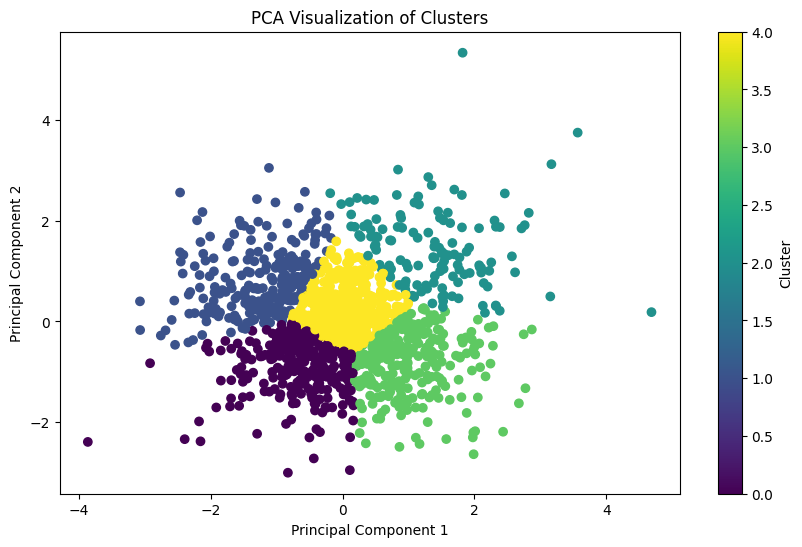

In [ ]:
# Visualize Clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_embeddings)
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['cluster'], cmap='viridis')
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

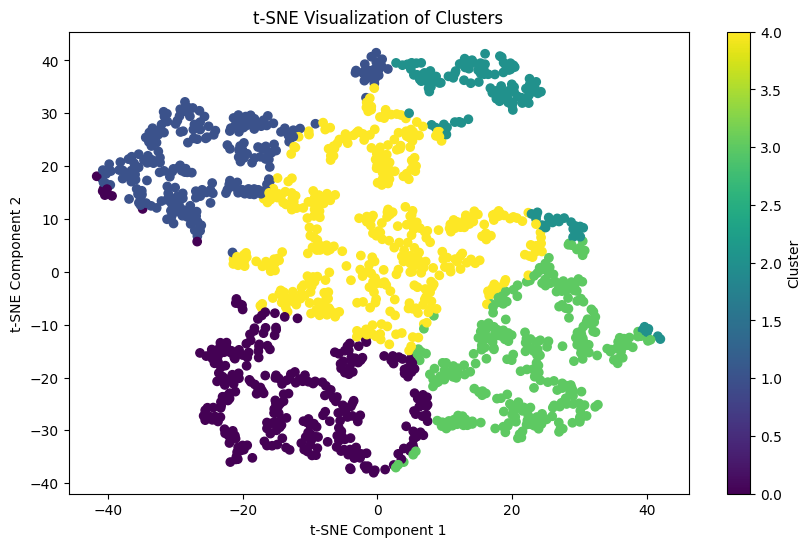

In [ ]:
# Visualize Clusters using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_embeddings)
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=data['cluster'], cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Cluster Profiling
cluster_centroids = kmeans_model.cluster_centers_

In [ ]:
cluster_centroids

array([[-0.1709971 , -1.0992478 ],
       [ 1.4539614 , -0.29993683],
       [ 0.04155182,  1.9989078 ],
       [-1.2573892 ,  0.12861428],
       [ 0.15959014,  0.22861987]], dtype=float32)

##Apply Machine Learning Algorithms

In [ ]:
clustered=data[['concatenated_title_embeddings', 'averaged_title_embeddings', 'concatenated_text_embeddings', 'averaged_text_embeddings','cluster']]

In [ ]:
clustered.head()

,concatenated_title_embeddings,averaged_title_embeddings,concatenated_text_embeddings,averaged_text_embeddings,cluster
0,0.001926,0.000276,-0.145948,0.013673,1
1,-0.004085,0.000384,0.071166,0.017294,2
2,-0.009314,0.000345,-0.091175,0.028836,3
3,-0.000222,-0.000135,-0.100954,0.009535,4
4,0.001150,-0.000290,-0.028830,-0.004155,2


In [ ]:
clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   concatenated_title_embeddings  1391 non-null   float32
 1   averaged_title_embeddings      1391 non-null   float32
 2   concatenated_text_embeddings   1391 non-null   float32
 3   averaged_text_embeddings       1391 non-null   float32
 4   cluster                        1391 non-null   int32  
dtypes: float32(4), int32(1)
memory usage: 27.3 KB


#####**EDA after clustering**

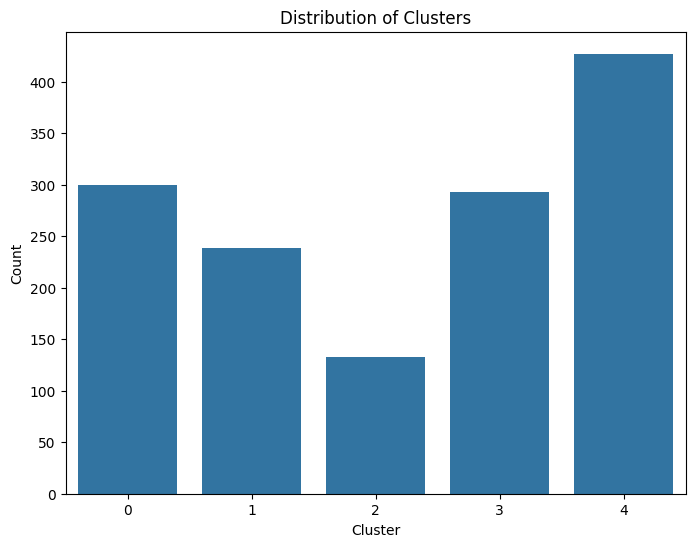

In [ ]:
# Plot 1: Distribution of Clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=clustered)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

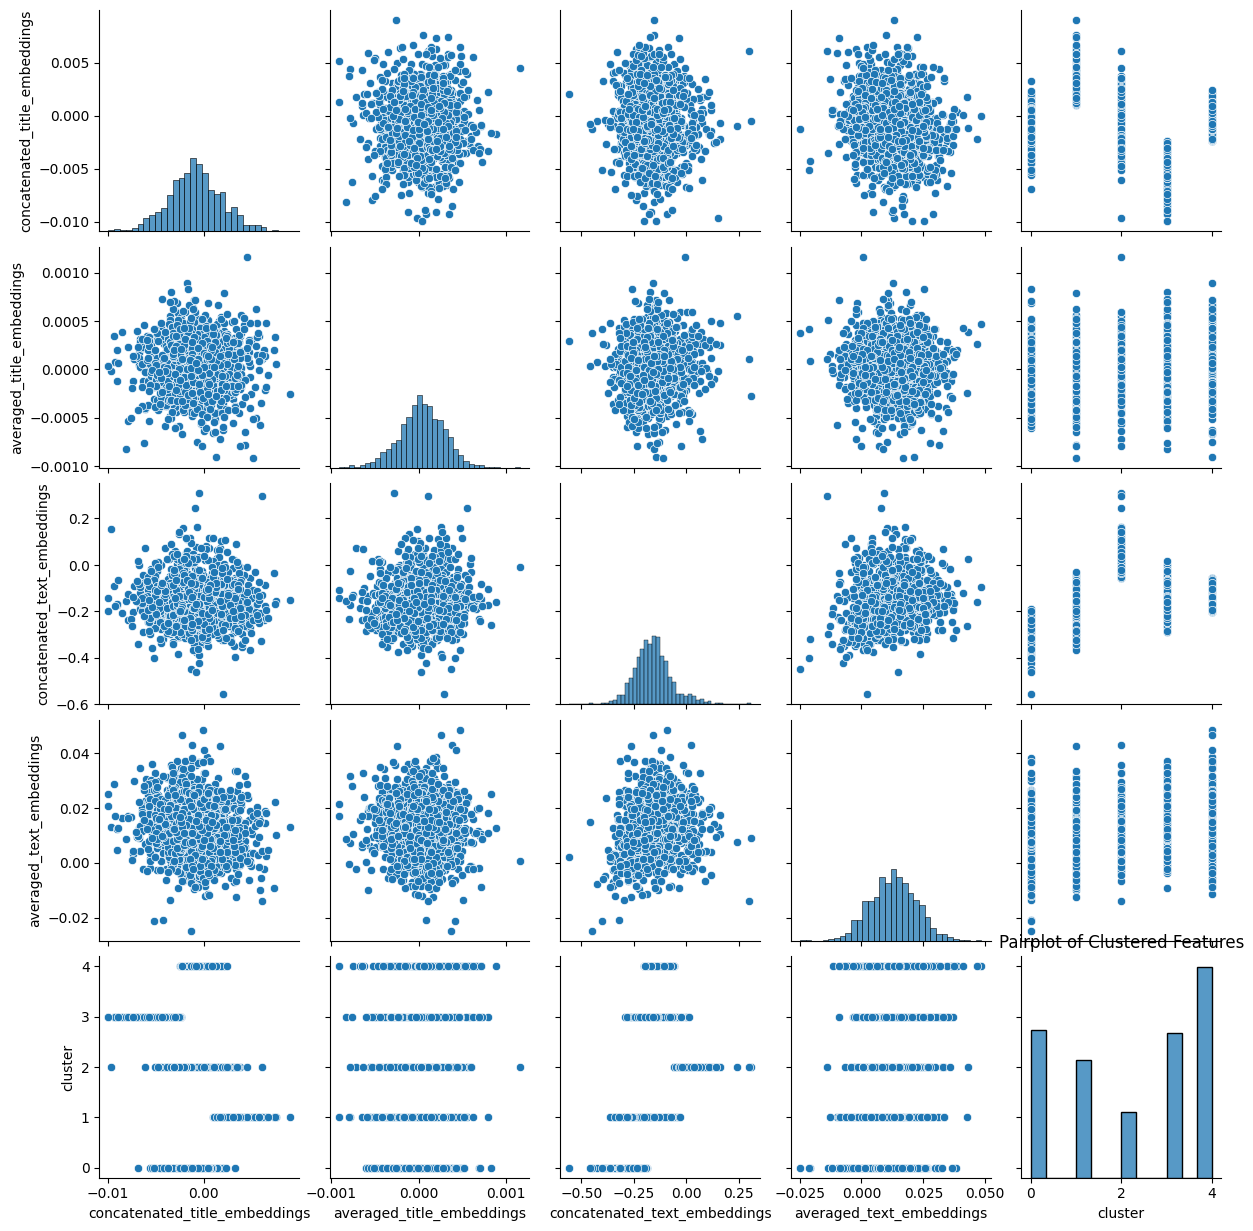

In [ ]:
# Plot 2: Pairplot of Clustered Features
sns.pairplot(clustered)
plt.title('Pairplot of Clustered Features')
plt.show()

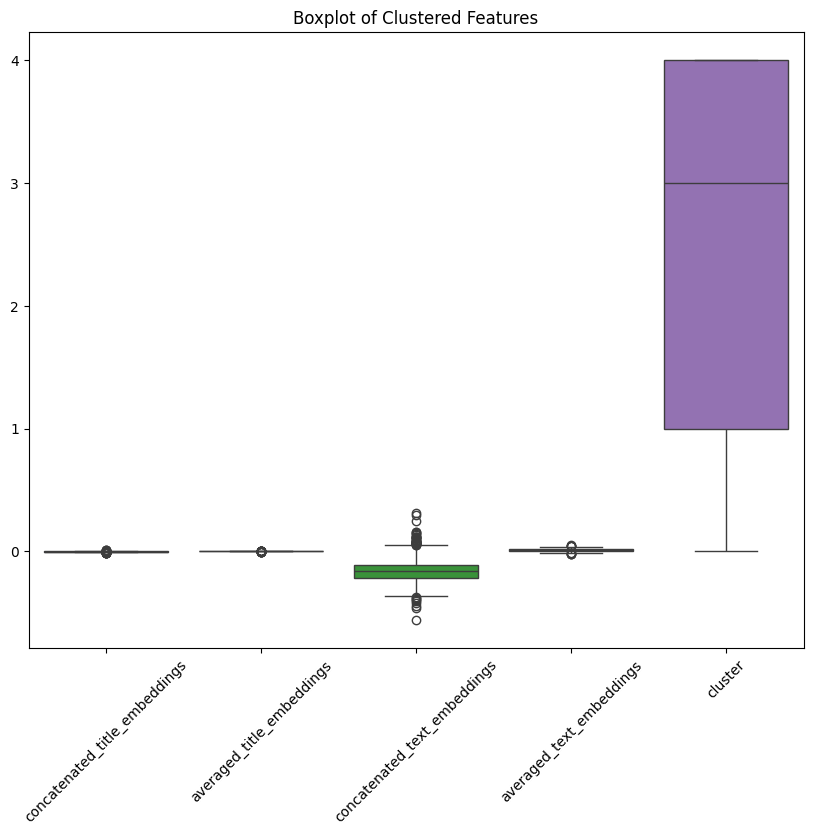

In [ ]:
# Plot 3: Boxplot of Clustered Features
plt.figure(figsize=(10, 8))
sns.boxplot(data=clustered)
plt.title('Boxplot of Clustered Features')
plt.xticks(rotation=45)
plt.show()

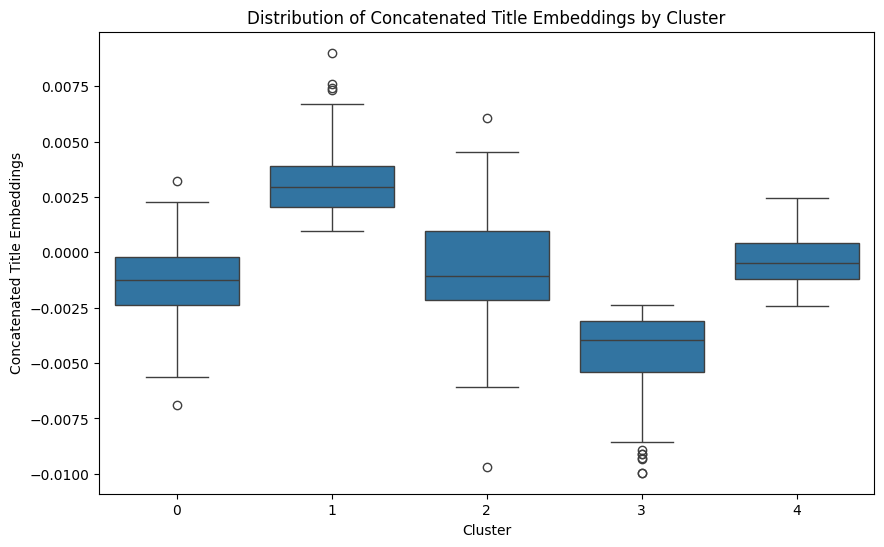

In [ ]:
# Plot 4: Distribution of Concatenated Title Embeddings by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='concatenated_title_embeddings', data=clustered)
plt.title('Distribution of Concatenated Title Embeddings by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Concatenated Title Embeddings')
plt.show()

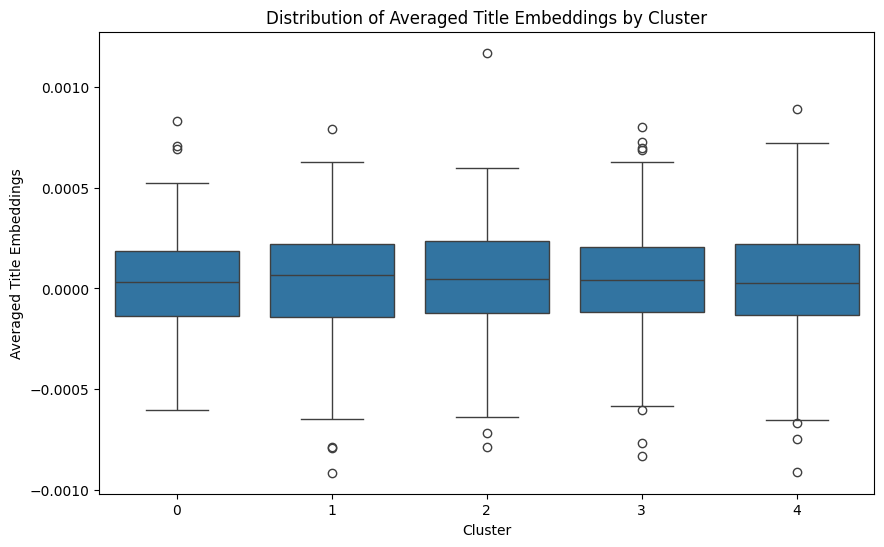

In [ ]:
# Plot 5: Distribution of Averaged Title Embeddings by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='averaged_title_embeddings', data=clustered)
plt.title('Distribution of Averaged Title Embeddings by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Averaged Title Embeddings')
plt.show()

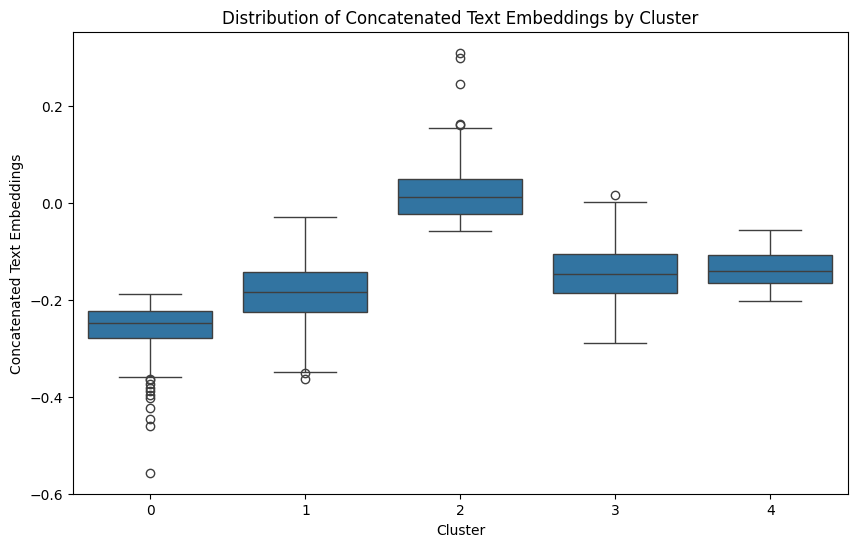

In [ ]:
# Plot 6: Distribution of Concatenated Text Embeddings by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='concatenated_text_embeddings', data=clustered)
plt.title('Distribution of Concatenated Text Embeddings by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Concatenated Text Embeddings')
plt.show()

<Figure size 1000x800 with 0 Axes>

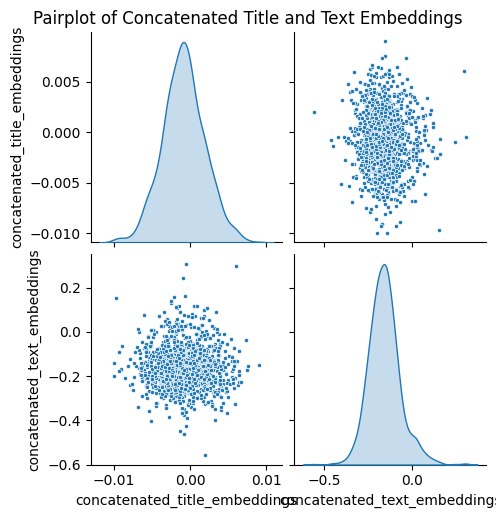

In [ ]:
# Plot Pairplot of Concatenated Title and Text Embeddings
plt.figure(figsize=(10, 8))
sns.pairplot(clustered[['concatenated_title_embeddings', 'concatenated_text_embeddings']],
             diag_kind='kde', markers='.', palette='viridis')
plt.suptitle('Pairplot of Concatenated Title and Text Embeddings', y=1.02)
plt.show()

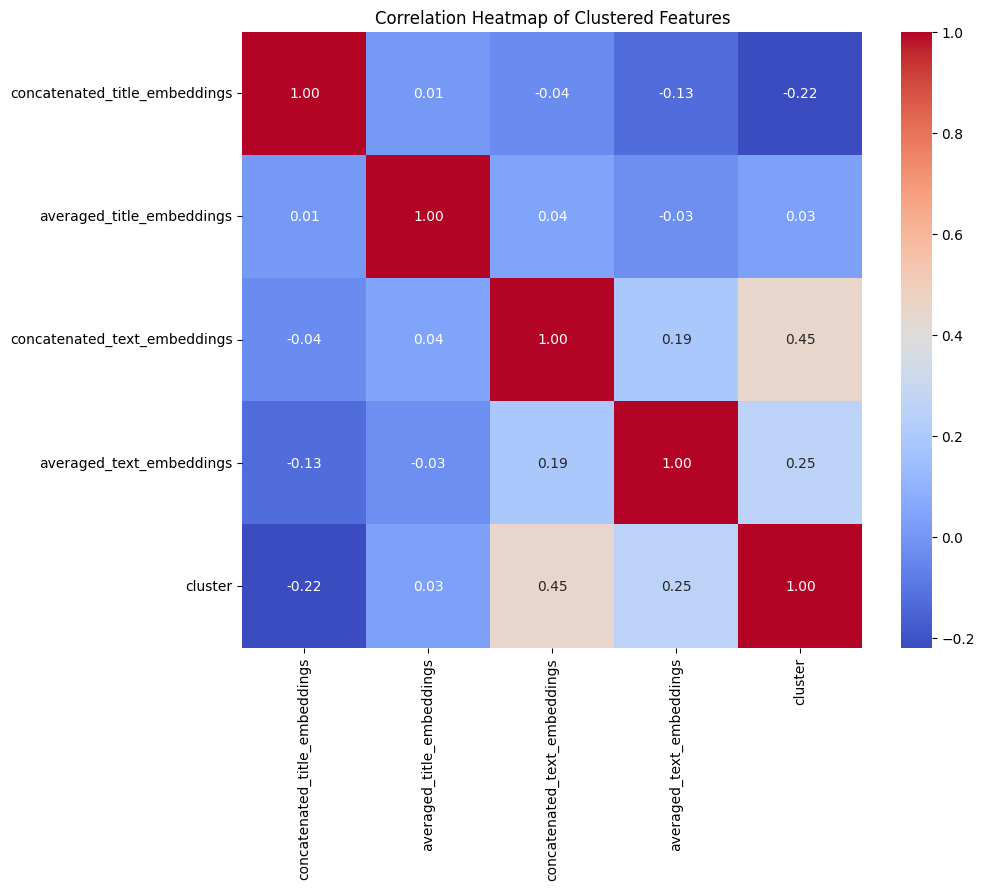

In [ ]:
# Plot 10: Correlation Heatmap of Clustered Features
plt.figure(figsize=(10, 8))
sns.heatmap(clustered.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Clustered Features')
plt.show()

#####**X and Y variables**

In [ ]:
# Features (X)
X = clustered[['concatenated_title_embeddings', 'averaged_title_embeddings', 'concatenated_text_embeddings', 'averaged_text_embeddings']]

In [ ]:
X.head()

,concatenated_title_embeddings,averaged_title_embeddings,concatenated_text_embeddings,averaged_text_embeddings
0,0.001926,0.000276,-0.145948,0.013673
1,-0.004085,0.000384,0.071166,0.017294
2,-0.009314,0.000345,-0.091175,0.028836
3,-0.000222,-0.000135,-0.100954,0.009535
4,0.001150,-0.000290,-0.028830,-0.004155


In [ ]:
# Target variable (y)
y = data['cluster']

In [ ]:
y.head()

0    1
1    2
2    3
3    4
4    2
Name: cluster, dtype: int32

#####**Split x_train and y_train**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit and transform the scaler on training data, and transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#####**RandomForest Classifier**

In [ ]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [ ]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Making predictions
rf_pred = rf_classifier.predict(X_test)
rf_pred_proba = rf_classifier.predict_proba(X_test)[:,1]

In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, rf_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        68
           1       0.90      0.92      0.91        51
           2       0.93      1.00      0.97        28
           3       1.00      0.98      0.99        48
           4       0.99      0.93      0.96        84

    accuracy                           0.95       279
   macro avg       0.95      0.96      0.95       279
weighted avg       0.95      0.95      0.95       279



#####**SVC classifier**

In [ ]:
# Initialize SVC classifier
svc_classifier = SVC(random_state=42)

In [ ]:
# Train the model
svc_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# Making predictions
svc_pred = svc_classifier.predict(X_test)

In [ ]:
# Classification Report
print("SVC Classification Report:\n", classification_report(y_test, svc_pred))

SVC Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.93      0.77        68
           1       1.00      0.02      0.04        51
           2       0.96      0.93      0.95        28
           3       0.67      0.08      0.15        48
           4       0.55      0.98      0.70        84

    accuracy                           0.63       279
   macro avg       0.77      0.59      0.52       279
weighted avg       0.72      0.63      0.53       279



#####**KNN classifier**

In [ ]:
# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

In [ ]:
# Train the model
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Making predictions
knn_pred = knn_classifier.predict(X_test)

In [ ]:
# Classification Report
print("KNN Classification Report:\n", classification_report(y_test, knn_pred))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.91      0.79        68
           1       0.75      0.35      0.48        51
           2       0.97      1.00      0.98        28
           3       0.78      0.44      0.56        48
           4       0.65      0.85      0.73        84

    accuracy                           0.72       279
   macro avg       0.77      0.71      0.71       279
weighted avg       0.73      0.72      0.70       279



#####**AdaBoost classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Initialize AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

In [ ]:
# Train the model
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
# Making predictions
adaboost_pred = adaboost_classifier.predict(X_test)

In [ ]:
# Classification Report
print("AdaBoost Classification Report:\n", classification_report(y_test, adaboost_pred))

AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.96      0.86        68
           1       0.87      0.90      0.88        51
           2       0.90      1.00      0.95        28
           3       1.00      0.75      0.86        48
           4       0.97      0.88      0.93        84

    accuracy                           0.89       279
   macro avg       0.91      0.90      0.90       279
weighted avg       0.91      0.89      0.89       279



#####**GradientBoosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Initialize Gradient Boosting classifier
gradientboost_classifier = GradientBoostingClassifier(random_state=42)

In [ ]:
# Train the model
gradientboost_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Making predictions
gradientboost_pred = gradientboost_classifier.predict(X_test)

In [ ]:
# Classification Report
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gradientboost_pred))

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        68
           1       0.90      0.92      0.91        51
           2       0.97      1.00      0.98        28
           3       0.98      1.00      0.99        48
           4       0.99      0.93      0.96        84

    accuracy                           0.95       279
   macro avg       0.95      0.96      0.96       279
weighted avg       0.95      0.95      0.95       279



#####**Xgboost Classifier**

In [ ]:
# Initialize XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

In [ ]:
# Train the model
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Making predictions
xgb_pred = xgb_classifier.predict(X_test)

In [ ]:
# Classification Report
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_pred))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        68
           1       0.98      0.92      0.95        51
           2       0.93      1.00      0.97        28
           3       1.00      0.98      0.99        48
           4       0.99      0.95      0.97        84

    accuracy                           0.96       279
   macro avg       0.96      0.97      0.96       279
weighted avg       0.97      0.96      0.96       279



#####**Applying Deep Learning Algorithm**

#####**LSTM**

In [ ]:
# Reshape input data to include the timestep dimension
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [ ]:
# Initialize the model
model = Sequential()

In [ ]:
# Add an LSTM layer with 100 units and dropout for regularization
model.add(LSTM(100, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))

# Add another LSTM layer with 50 units and dropout for regularization
model.add(LSTM(50))
model.add(Dropout(0.2))

# Add a dense output layer with softmax activation for classification
model.add(Dense(5, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 100)            40800     
                                                                 
 dropout (Dropout)           (None, 4, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 5)                 255       
                                                                 
Total params: 71255 (278.34 KB)
Trainable params: 71255 (278.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


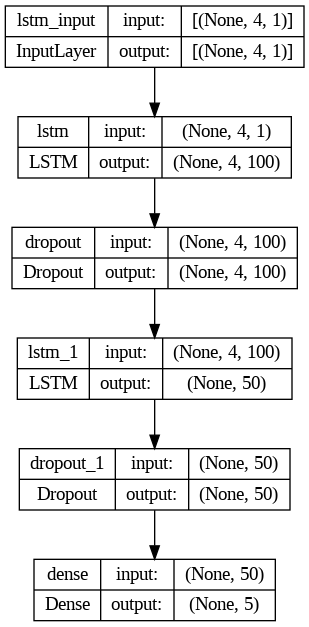

In [ ]:
# Plot the model
plot_model(
    model,
    to_file='model_flowchart.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',  # Top to Bottom orientation
    expand_nested=True,
    dpi=96
)

In [ ]:
# Fit the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/100
35/35 [==============================] - 15s 61ms/step - loss: 1.4901 - accuracy: 0.4371 - val_loss: 1.3266 - val_accuracy: 0.4552
Epoch 2/100
35/35 [==============================] - 0s 14ms/step - loss: 1.1738 - accuracy: 0.5108 - val_loss: 1.1406 - val_accuracy: 0.5771
Epoch 3/100
35/35 [==============================] - 0s 12ms/step - loss: 1.0093 - accuracy: 0.6448 - val_loss: 0.9584 - val_accuracy: 0.6237
Epoch 4/100
35/35 [==============================] - 0s 13ms/step - loss: 0.8756 - accuracy: 0.6727 - val_loss: 0.8222 - val_accuracy: 0.6595
Epoch 5/100
35/35 [==============================] - 0s 13ms/step - loss: 0.7648 - accuracy: 0.6960 - val_loss: 0.7532 - val_accuracy: 0.6953
Epoch 6/100
35/35 [==============================] - 1s 17ms/step - loss: 0.7015 - accuracy: 0.7212 - val_loss: 0.6945 - val_accuracy: 0.6989
Epoch 7/100
35/35 [==============================] - 1s 14ms/step - loss: 0.6825 - accuracy: 0.7293 - val_loss: 0.6754 - val_accuracy: 0.7204
Epoch

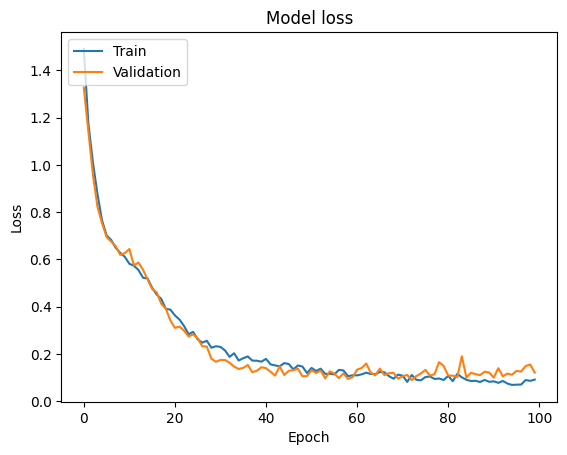

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

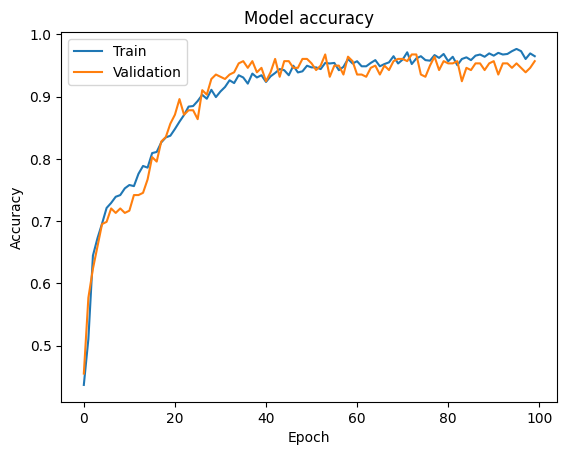

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Make predictions
y_pred = model.predict(X_test_reshaped)

9/9 [==============================] - 1s 3ms/step


In [ ]:
# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        68
           1       0.94      1.00      0.97        51
           2       0.96      0.86      0.91        28
           3       1.00      0.94      0.97        48
           4       0.93      0.96      0.95        84

    accuracy                           0.96       279
   macro avg       0.96      0.95      0.95       279
weighted avg       0.96      0.96      0.96       279



#####**GRU**

In [ ]:
# Initialize the model
model = Sequential()

# Add a GRU layer with 100 units and dropout for regularization
model.add(GRU(100, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))  # 20% dropout for regularization

# Add another GRU layer with 50 units and dropout for regularization
model.add(GRU(50))
model.add(Dropout(0.2))  # 20% dropout for regularization

# Add a dense output layer with softmax activation for classification
model.add(Dense(5, activation='softmax'))  # Assuming 5 clusters/classes

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 4, 100)            30900     
                                                                 
 dropout_2 (Dropout)         (None, 4, 100)            0         
                                                                 
 gru_1 (GRU)                 (None, 50)                22800     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 255       
                                                                 
Total params: 53955 (210.76 KB)
Trainable params: 53955 (210.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/100
35/35 [==============================] - 6s 31ms/step - loss: 1.4088 - accuracy: 0.4344 - val_loss: 1.1816 - val_accuracy: 0.5556
Epoch 2/100
35/35 [==============================] - 0s 7ms/step - loss: 1.0193 - accuracy: 0.6043 - val_loss: 0.9092 - val_accuracy: 0.6487
Epoch 3/100
35/35 [==============================] - 0s 7ms/step - loss: 0.8194 - accuracy: 0.6763 - val_loss: 0.7659 - val_accuracy: 0.6918
Epoch 4/100
35/35 [==============================] - 0s 7ms/step - loss: 0.7413 - accuracy: 0.6969 - val_loss: 0.7145 - val_accuracy: 0.6953
Epoch 5/100
35/35 [==============================] - 0s 7ms/step - loss: 0.6824 - accuracy: 0.7176 - val_loss: 0.6742 - val_accuracy: 0.7133
Epoch 6/100
35/35 [==============================] - 0s 7ms/step - loss: 0.6502 - accuracy: 0.7320 - val_loss: 0.6369 - val_accuracy: 0.7276
Epoch 7/100
35/35 [==============================] - 0s 8ms/step - loss: 0.6053 - accuracy: 0.7563 - val_loss: 0.5825 - val_accuracy: 0.7563
Epoch 8/100


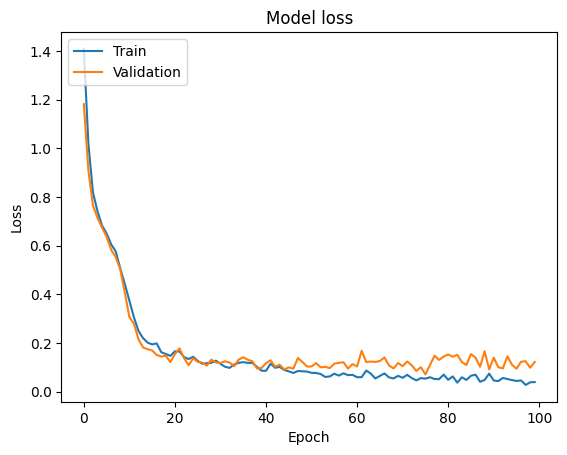

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

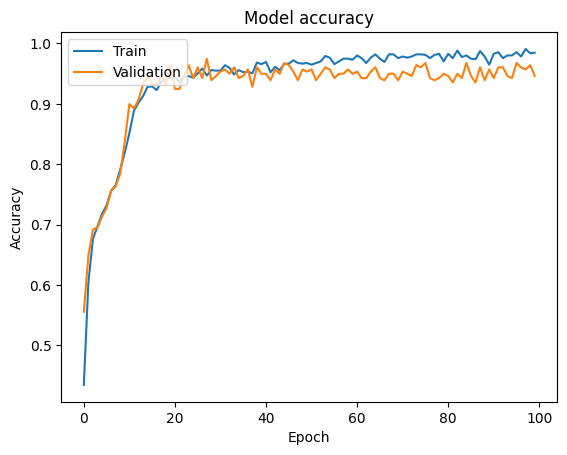

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Make predictions
y_pred = model.predict(X_test_reshaped)

9/9 [==============================] - 1s 3ms/step


In [ ]:
# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        68
           1       0.96      0.96      0.96        51
           2       0.92      0.86      0.89        28
           3       0.96      0.96      0.96        48
           4       0.93      0.94      0.93        84

    accuracy                           0.95       279
   macro avg       0.95      0.94      0.94       279
weighted avg       0.95      0.95      0.95       279



Based on the classification reports provided:

1. **LSTM**:
   - Weighted average F1-score: 0.96
   - Accuracy: 0.96

2. **Random Forest**:
   - Weighted average F1-score: 0.95
   - Accuracy: 0.95

3. **GRU**:
   - Weighted average F1-score: 0.95
   - Accuracy: 0.95

The top-performing algorithms based on the weighted average F1-score and accuracy are LSTM and Random Forest, both achieving a score of 0.96. However, LSTM slightly outperforms Random Forest by a very small margin. Therefore, the top 3 algorithms are LSTM, Random Forest, and GRU.

### **Summary:**

In this analysis, we explored a collection of articles from the "Towards Data Science" publication to identify key themes and topics discussed within the data science community. We employed web scraping techniques to gather the data and applied text preprocessing methods to clean and prepare the text for analysis. Latent Dirichlet Allocation (LDA) was used for topic modeling, which allowed us to extract underlying topics from the corpus of articles. Visualization techniques were utilized to interpret the topics and gain insights into prevalent subjects and trends within the data science domain.

Additionally, we performed classification using different algorithms such as LSTM, Random Forest, and GRU to predict the topics of the articles. Based on the evaluation metrics, including weighted average F1-score and accuracy, we identified LSTM and Random Forest as the top-performing algorithms.

### **Conclusions:**

Through our analysis, we were able to achieve the following conclusions:

1. Topic Modeling: The LDA model successfully identified distinct topics within the articles, providing valuable insights into the prevalent themes discussed in the "Towards Data Science" publication.

2. Classification: LSTM and Random Forest emerged as the top-performing algorithms for topic prediction, indicating their effectiveness in classifying articles based on their content.

3. Insights: The identified topics and classification results offer valuable insights into the trends and subjects of interest within the data science community as covered by the publication. This information can be used by researchers, practitioners, and enthusiasts to stay updated with the latest developments and explore potential research directions in the field of data science.

Overall, this analysis contributes to a better understanding of the content and trends within the data science community as reflected in the "Towards Data Science" publication, providing valuable insights for various stakeholders in the field.